In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr

In [4]:
df = pd.read_csv('/content/drive/MyDrive/usdrub.csv', index_col='date', parse_dates=['date'])
data = df.close

In [5]:
print('Количество строк:', data.shape[0])
print('Количество дней:', data.index.nunique())

Количество строк: 5323
Количество дней: 5323


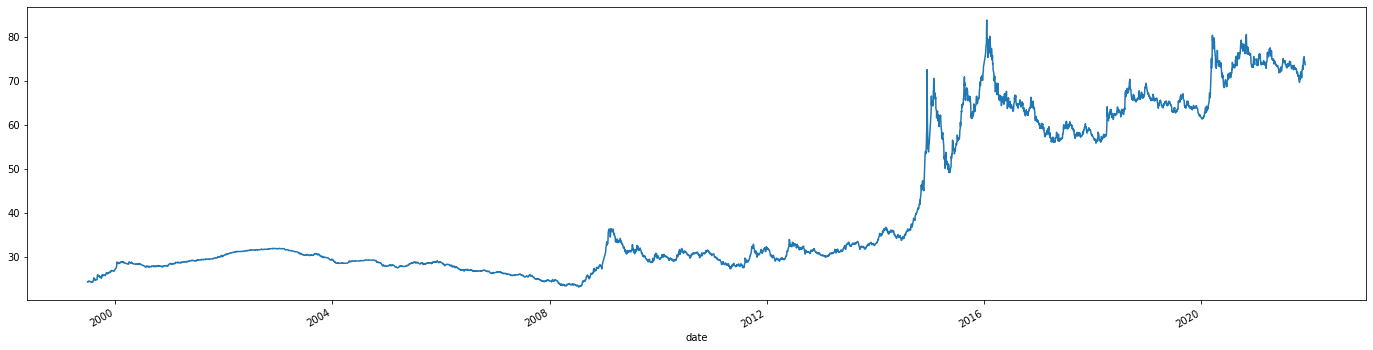

In [6]:
gr = data.plot(figsize=(24, 6))

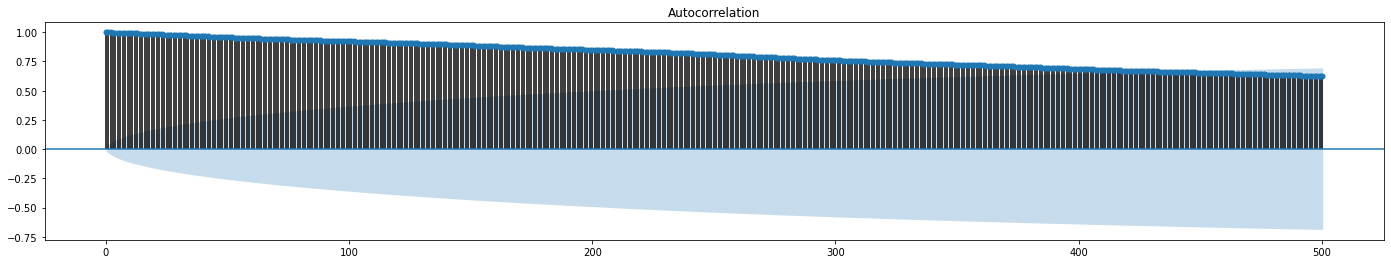

In [7]:
gr = sm.graphics.tsa.plot_acf(data, lags=500)
gr.set_figwidth(24)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


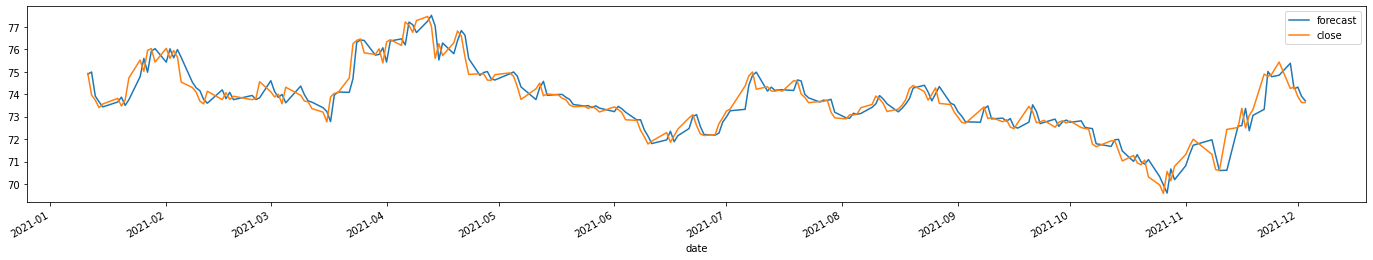

In [8]:
model = sm.tsa.ARIMA(data, order=(4, 2, 1)).fit()
gr = model.plot_predict('2021-01-11')
gr.set_figwidth(24)

In [9]:
pred = model.forecast()
pred

(array([73.65591001]),
 array([0.46432653]),
 array([[72.74584674, 74.56597329]]))

Изменения предыдущего блокнота начинаются отсюда

In [10]:
from sklearn.metrics import mean_squared_error
pred = model.predict(typ='levels')
len(pred)

5321

In [11]:
mse = mean_squared_error(data[2:], pred, squared=True)
mse

0.21566641033775874

In [12]:
model = sm.tsa.AR(data).fit()
pred = model.predict()
shft = len(data) - len(pred)
shft

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


32

In [13]:
mse = mean_squared_error(data[shft:], pred, squared=True)
mse

0.20910848552464267

In [14]:
model = sm.tsa.ARMA(data, order=(2, 1)).fit()
pred = model.predict()
shft = len(data) - len(pred)
mse = mean_squared_error(data[shft:], pred)
mse

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


0.3020488715042466

In [15]:
train = data[data.index < '2020-01-01']
test = data[data.index > '2020-01-01']
print('Всего выборка:', len(data))
print('Тренировочная выборка:', len(train))
print('Тестовая выборка:', len(test))

Всего выборка: 5323
Тренировочная выборка: 4867
Тестовая выборка: 456


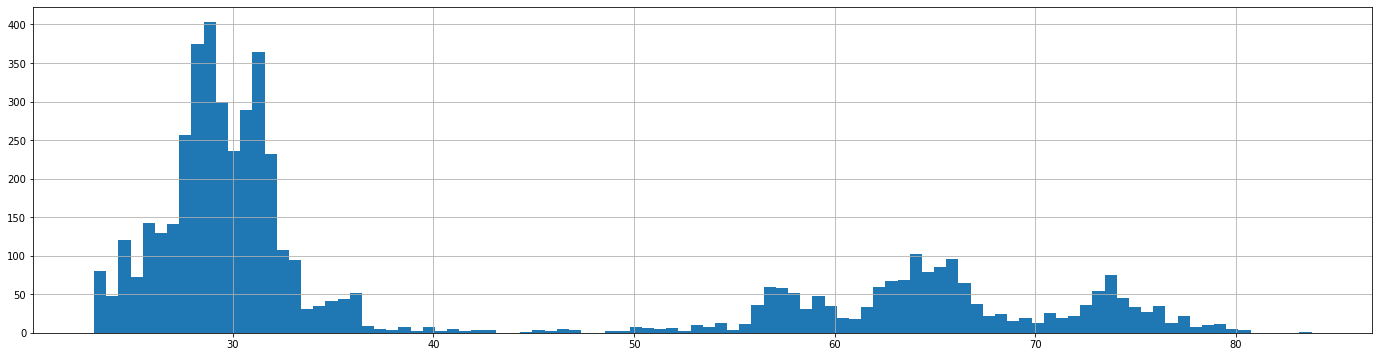

In [16]:
data.hist(figsize=(24, 6), bins=100)